In [11]:
import numpy as np 
import pandas as pd 
from pandas import Series,DataFrame
df = DataFrame({'key1':['a','a','b','b','a'],
               'key2':['one','two','one','two','one'],
               'data1':np.random.randn(5),'data2':np.random.randn(5)})
df 

,data1,data2,key1,key2
0,0.550512,0.490915,a,one
1,-0.121255,-1.129962,a,two
2,1.428077,-0.495845,b,one
3,-1.237614,-0.340622,b,two
4,0.679700,0.630421,a,one


In [12]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [13]:
grouped.mean()

key1
a    0.369652
b    0.095231
Name: data1, dtype: float64

In [14]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one     0.615106
      two    -0.121255
b     one     1.428077
      two    -1.237614
Name: data1, dtype: float64

In [15]:
means.unstack()

key2,one,two
key1,,
a,0.615106,-0.121255
b,1.428077,-1.237614


In [16]:
states = np.array(['ohio','california','california','ohio','ohio'])
years = np.array([2005,2005,2006,2005,2006])
df['data1'].groupby([states,years]).mean()

california  2005   -0.121255
            2006    1.428077
ohio        2005   -0.343551
            2006    0.679700
Name: data1, dtype: float64

In [17]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.369652,-0.002875
b,0.095231,-0.418233


In [18]:
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one   0.615106  0.560668
     two  -0.121255 -1.129962
b    one   1.428077 -0.495845
     two  -1.237614 -0.340622

In [19]:
for name,group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0  0.550512  0.490915    a  one
1 -0.121255 -1.129962    a  two
4  0.679700  0.630421    a  one
b
      data1     data2 key1 key2
2  1.428077 -0.495845    b  one
3 -1.237614 -0.340622    b  two


In [20]:
for (k1,k2),group in df.groupby(['key1','key2']):
    print(k1,k2)
    print(group)

a one
      data1     data2 key1 key2
0  0.550512  0.490915    a  one
4  0.679700  0.630421    a  one
a two
      data1     data2 key1 key2
1 -0.121255 -1.129962    a  two
b one
      data1     data2 key1 key2
2  1.428077 -0.495845    b  one
b two
      data1     data2 key1 key2
3 -1.237614 -0.340622    b  two


In [21]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,data1,data2,key1,key2
2,1.428077,-0.495845,b,one
3,-1.237614,-0.340622,b,two


In [22]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [23]:
grouped = df.groupby(df.dtypes,axis=1)

In [24]:
dict(list(grouped))

{dtype('float64'):       data1     data2
 0  0.550512  0.490915
 1 -0.121255 -1.129962
 2  1.428077 -0.495845
 3 -1.237614 -0.340622
 4  0.679700  0.630421, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

In [25]:
df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

In [26]:
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [27]:
df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.560668
     two  -1.129962
b    one  -0.495845
     two  -0.340622

In [28]:
s_grouped = df.groupby(['key1','key2'])['data2']

In [29]:
s_grouped

In [30]:
s_grouped.mean()

key1  key2
a     one     0.560668
      two    -1.129962
b     one    -0.495845
      two    -0.340622
Name: data2, dtype: float64

In [31]:
people = DataFrame(np.random.randn(5,5),
                  columns=['a','b','c','d','e'],
                  index=['joe','steve','wes','jim','travis'])

In [32]:
people.ix[2:3,['b','c']]=np.nan

D:\anaconde\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [33]:
people

,a,b,c,d,e
joe,0.811544,0.788091,0.047577,0.178610,1.149392
steve,-0.339321,0.438493,0.164207,-1.233434,0.113099
wes,0.312277,NaN,NaN,-1.737608,0.793470
jim,0.108449,-1.735857,0.219614,-0.956263,1.813072
travis,0.256144,1.792996,-0.010336,-2.789957,-0.744565


In [34]:
mapping = {'a':'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'}

In [35]:
by_column = people.groupby(mapping,axis=1)
by_column

In [36]:
by_column.sum()

,blue,red
joe,0.226188,2.749027
steve,-1.069227,0.212271
wes,-1.737608,1.105748
jim,-0.736649,0.185663
travis,-2.800294,1.304575


In [37]:
map_series = Series(mapping)

In [38]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [39]:
people.groupby(map_series,axis=1).count()

,blue,red
joe,2,3
steve,2,3
wes,1,2
jim,2,3
travis,2,3


In [40]:
people.groupby(len).sum()

,a,b,c,d,e
3,1.232270,-0.947766,0.267191,-2.515260,3.755934
5,-0.339321,0.438493,0.164207,-1.233434,0.113099
6,0.256144,1.792996,-0.010336,-2.789957,-0.744565


In [41]:
key_list = ['one','one','one','two','two']

In [42]:
people.groupby([len,key_list]).min()

a         b         c         d         e
3 one  0.312277  0.788091  0.047577 -1.737608  0.793470
  two  0.108449 -1.735857  0.219614 -0.956263  1.813072
5 one -0.339321  0.438493  0.164207 -1.233434  0.113099
6 two  0.256144  1.792996 -0.010336 -2.789957 -0.744565

In [43]:
columns = pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],[1,3,5,1,3]],
                                    names=['cty','tenor'])

In [44]:
hier_df = DataFrame(np.random.randn(4,5),columns=columns)

In [45]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      1.043426 -0.940335 -1.228696  0.379779 -0.586553
1      0.409138  0.800658 -0.398923 -0.894061 -0.380642
2     -0.610538  0.368902  2.689498  0.604304  1.175795
3      0.922790 -1.283930  0.752202 -0.665478 -1.089985

In [46]:
hier_df.groupby(level='cty',axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [47]:
df

,data1,data2,key1,key2
0,0.550512,0.490915,a,one
1,-0.121255,-1.129962,a,two
2,1.428077,-0.495845,b,one
3,-1.237614,-0.340622,b,two
4,0.679700,0.630421,a,one


In [48]:
grouped = df.groupby('key1')

In [49]:
grouped['data1'].quantile(0.9)

key1
a    0.653862
b    1.161508
Name: data1, dtype: float64

In [50]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [51]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,0.800955,1.760383
b,2.665691,0.155223


In [52]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.369652  0.430017 -0.121255  0.214628  0.550512  0.615106   
b      2.0  0.095231  1.884928 -1.237614 -0.571191  0.095231  0.761654   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.679700   3.0 -0.002875  0.978575 -1.129962 -0.319523  0.490915   
b     1.428077   2.0 -0.418233  0.109759 -0.495845 -0.457039 -0.418233   

                          
           75%       max  
key1                      
a     0.560668  0.630421  
b    -0.379428 -0.340622

In [143]:
import numpy as np 
import pandas as pd 
from pandas import Series,DataFrame
tips = pd.read_csv(r'D:\pythondata\ch08\tips.csv')

In [144]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [145]:
tips[:6]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


In [146]:
grouped = tips.groupby(['sex','smoker'])

In [147]:
grouped_pct = grouped['tip_pct']

In [148]:
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [149]:
grouped_pct.agg(['mean','std',peak_to_peak])

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [60]:
grouped_pct.agg([('foo','mean'),('bar',np.std)])

foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [61]:
functions = ['count','mean','max']

In [62]:
result = grouped['tip_pct','total_bill'].agg(functions)

In [63]:
result

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [64]:
result['tip_pct']

count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [65]:
ftuples = [('Durchschnitt','mean'),('Abweichung',np.var)]

In [66]:
grouped['tip_pct','total_bill'].agg(ftuples)

tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

In [67]:
grouped.agg({'tip':np.max,'size':'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [68]:
grouped.agg({'tip_pct':['min','max','mean','std'],'size':'sum'})

tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

In [69]:
tips.groupby(['sex','smoker'],as_index=False).mean()

,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


In [70]:
df

,data1,data2,key1,key2
0,0.550512,0.490915,a,one
1,-0.121255,-1.129962,a,two
2,1.428077,-0.495845,b,one
3,-1.237614,-0.340622,b,two
4,0.679700,0.630421,a,one


In [71]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')

In [72]:
k1_means

,mean_data1,mean_data2
key1,,
a,0.369652,-0.002875
b,0.095231,-0.418233


In [73]:
pd.merge(df,k1_means,left_on='key1',right_index=True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,0.550512,0.490915,a,one,0.369652,-0.002875
1,-0.121255,-1.129962,a,two,0.369652,-0.002875
4,0.679700,0.630421,a,one,0.369652,-0.002875
2,1.428077,-0.495845,b,one,0.095231,-0.418233
3,-1.237614,-0.340622,b,two,0.095231,-0.418233


In [74]:
key = ['one','two','one','two','one']

In [75]:
people.groupby(key).mean()

,a,b,c,d,e
one,0.459988,1.290543,0.018621,-1.449652,0.399433
two,-0.115436,-0.648682,0.191911,-1.094849,0.963085


In [76]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
joe,0.459988,1.290543,0.018621,-1.449652,0.399433
steve,-0.115436,-0.648682,0.191911,-1.094849,0.963085
wes,0.459988,1.290543,0.018621,-1.449652,0.399433
jim,-0.115436,-0.648682,0.191911,-1.094849,0.963085
travis,0.459988,1.290543,0.018621,-1.449652,0.399433


In [77]:
def demean(arr):
    return arr - arr.mean()

In [78]:
demeaned = people.groupby(key).transform(demean)

In [79]:
demeaned

,a,b,c,d,e
joe,0.351556,-0.502452,0.028957,1.628262,0.749960
steve,-0.223885,1.087175,-0.027703,-0.138586,-0.849986
wes,-0.147711,NaN,NaN,-0.287956,0.394038
jim,0.223885,-1.087175,0.027703,0.138586,0.849986
travis,-0.203845,0.502452,-0.028957,-1.340306,-1.143997


In [80]:
demeaned.groupby(key).mean()

,a,b,c,d,e
one,5.551115e-17,-5.551115e-17,0.000000e+00,7.401487e-17,-7.401487e-17
two,0.000000e+00,0.000000e+00,-1.387779e-17,0.000000e+00,0.000000e+00


In [81]:
def top(df,n=5,column='tip_pct'):
    return df.sort_index(by=column)[-n:]

In [82]:
top(tips,n=6)

D:\anaconde\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [83]:
tips.groupby('smoker').apply(top)

D:\anaconde\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [84]:
tips.groupby(['smoker','day']).apply(top,n=1,column='total_bill')

D:\anaconde\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

In [85]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [86]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [87]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [88]:
f = lambda x:x.describe()

In [89]:
grouped.apply(f)

total_bill        tip       size    tip_pct
sex    smoker                                                   
Female No     count   54.000000  54.000000  54.000000  54.000000
              mean    18.105185   2.773519   2.592593   0.156921
              std      7.286455   1.128425   1.073146   0.036421
              min      7.250000   1.000000   1.000000   0.056797
              25%     12.650000   2.000000   2.000000   0.139708
              50%     16.690000   2.680000   2.000000   0.149691
              75%     20.862500   3.437500   3.000000   0.181630
              max     35.830000   5.200000   6.000000   0.252672
       Yes    count   33.000000  33.000000  33.000000  33.000000
              mean    17.977879   2.931515   2.242424   0.182150
              std      9.189751   1.219916   0.613917   0.071595
              min      3.070000   1.000000   1.000000   0.056433
              25%     12.760000   2.000000   2.000000   0.152439
              50%     16.270000   2.880000   2.000000   0.173913
              75%     22.120000   3.500000   2.000000   0.198216
              max     44.300000   6.500000   4.000000   0.416667
Male   No     count   97.000000  97.000000  97.000000  97.000000
              mean    19.791237   3.113402   2.711340   0.160669
              std      8.726566   1.489559   0.989094   0.041849
              min      7.510000   1.250000   2.000000   0.071804
              25%     13.810000   2.000000   2.000000   0.131810
              50%     18.240000   2.740000   2.000000   0.157604
              75%     22.820000   3.710000   3.000000   0.186220
              max     48.330000   9.000000   6.000000   0.291990
       Yes    count   60.000000  60.000000  60.000000  60.000000
              mean    22.284500   3.051167   2.500000   0.152771
              std      9.911845   1.500120   0.892530   0.090588
              min      7.250000   1.000000   1.000000   0.035638
              25%     15.272500   2.000000   2.000000   0.101845
              50%     20.390000   3.000000   2.000000   0.141015
              75%     28.572500   3.820000   3.000000   0.191697
              max     50.810000  10.000000   5.000000   0.710345

In [90]:
tips.groupby('smoker',group_keys=False).apply(top)

D:\anaconde\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


,total_bill,tip,sex,smoker,day,time,size,tip_pct
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [91]:
frame = DataFrame({'data1':np.random.randn(1000),'data2':np.random.randn(1000)})

In [92]:
factor = pd.cut(frame.data1,4)

In [93]:
factor[:10]

0    (-1.423, 0.00945]
1     (0.00945, 1.442]
2    (-1.423, 0.00945]
3    (-1.423, 0.00945]
4    (-1.423, 0.00945]
5     (0.00945, 1.442]
6    (-1.423, 0.00945]
7       (1.442, 2.874]
8    (-1.423, 0.00945]
9     (0.00945, 1.442]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.861, -1.423] < (-1.423, 0.00945] < (0.00945, 1.442] < (1.442, 2.874]]

In [94]:
def get_stats(group):
    return {'min':group.min(),'max':group.max(),'count':group.count(),'mean':group.mean()}

In [95]:
grouped = frame.data2.groupby(factor)

In [96]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.861, -1.423]",79.0,2.436046,0.077126,-1.919954
"(-1.423, 0.00945]",432.0,2.735344,0.048131,-3.201261
"(0.00945, 1.442]",423.0,2.311333,0.045628,-2.835177
"(1.442, 2.874]",66.0,2.594220,-0.200947,-2.614143


In [97]:
grouping = pd.qcut(frame.data1,10,labels=False)

In [98]:
grouped = frame.data2.groupby(grouping)

In [99]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.436046,0.035016,-2.172265
1,100.0,2.348852,0.161364,-2.443890
2,100.0,2.343451,0.022346,-3.201261
3,100.0,1.900237,0.037637,-2.446177
4,100.0,2.735344,-0.021126,-2.100046
5,100.0,2.142236,-0.016304,-2.834209
6,100.0,2.216282,0.192325,-2.835177
7,100.0,2.178111,-0.041641,-2.436121
8,100.0,2.166561,0.045026,-2.467739


In [100]:
s = Series(np.random.randn(6))

In [101]:
s[::2]=np.nan

In [102]:
s

0         NaN
1    1.098460
2         NaN
3    1.338291
4         NaN
5   -0.063194
dtype: float64

In [103]:
s.fillna(s.mean())

0    0.791185
1    1.098460
2    0.791185
3    1.338291
4    0.791185
5   -0.063194
dtype: float64

In [104]:
states = ['ohio','new york','vermont','florida','oregon','nevada','california','idaho']

In [105]:
group_key = ['east']*4 + ['west']* 4

In [106]:
import pandas as pd 
import numpy as np 
from pandas  import Series,DataFrame
data = Series(np.random.randn(8),index=states)

In [107]:
data[['vermont','nevada','ohio']]=np.nan

In [108]:
data 

ohio               NaN
new york     -0.016894
vermont            NaN
florida      -0.719945
oregon       -0.710677
nevada             NaN
california   -1.007445
idaho        -0.872712
dtype: float64

In [109]:
data.groupby(group_key).mean()

east   -0.368420
west   -0.863612
dtype: float64

In [110]:
fill_mean = lambda g:g.fillna(g.mean())

In [111]:
data.groupby(group_key).apply(fill_mean)

ohio         -0.368420
new york     -0.016894
vermont      -0.368420
florida      -0.719945
oregon       -0.710677
nevada       -0.863612
california   -1.007445
idaho        -0.872712
dtype: float64

In [112]:
fill_values = {'east':0.5,'west':-1}

In [113]:
fill_func = lambda g:g.fillna(fill_values[g.name])

In [114]:
data.groupby(group_key).apply(fill_func)

ohio          0.500000
new york     -0.016894
vermont       0.500000
florida      -0.719945
oregon       -0.710677
nevada       -1.000000
california   -1.007445
idaho        -0.872712
dtype: float64

In [115]:
import numpy as np 
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

suits = ['H','S','C','D']
card_val = (list(range(1,11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2,11)) + ['J','K','Q']
cards = []
for suit in ['H','S','C','D']:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val,index=cards)

In [116]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [117]:
def draw(deck,n=5):
    return deck.take(np.random.permutation(len(deck))[:n])

In [118]:
draw(deck)

7S      7
3D      3
QH     10
10D    10
9C      9
dtype: int64

In [119]:
get_suit = lambda card:card[-1]

In [120]:
deck.groupby(get_suit).apply(draw,n=2)

C  AC    1
   9C    9
D  2D    2
   8D    8
H  AH    1
   7H    7
S  2S    2
   8S    8
dtype: int64

In [121]:
deck.groupby(get_suit,group_keys=False).apply(draw,n=2)

3C      3
2C      2
2D      2
AD      1
JH     10
9H      9
QS     10
10S    10
dtype: int64

In [122]:
df = DataFrame({'category':['a','a','a','a','b','b','b','b'],'data':np.random.randn(8),
               'weights':np.random.rand(8)})

In [123]:
df

,category,data,weights
0,a,-0.581534,0.706298
1,a,0.427287,0.520518
2,a,1.270934,0.821909
3,a,0.987224,0.819139
4,b,-0.919764,0.522233
5,b,-0.189515,0.387626
6,b,-0.643441,0.058971
7,b,0.279982,0.494539


In [124]:
grouped = df.groupby('category')

In [125]:
get_wavg = lambda g:np.average(g['data'],weights=g['weights'])

In [126]:
grouped.apply(get_wavg)

category
a    0.580550
b   -0.309747
dtype: float64

In [127]:
close_px = pd.read_csv('D:\pythondata\ch09\stock_px.csv',parse_dates=True,index_col=0)

In [128]:
close_px

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [129]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [130]:
rets = close_px.pct_change().dropna()

In [131]:
spx_corr = lambda x :x.corrwith(x['SPX'])

In [132]:
by_year = rets.groupby(lambda x:x.year)

In [133]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [134]:
by_year.apply(lambda g:g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [135]:
import statsmodels.api as sm 
def regress(data,yvar,xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept']=1.
    result = sm.OLS(Y,X).fit()
    return result.params

D:\anaconde\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [136]:
by_year.apply(regress,'AAPL',['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


In [137]:
import numpy as np 
import pandas as pd 
from pandas import Series,DataFrame
tips = pd.read_csv(r'D:\pythondata\ch08\tips.csv')

In [141]:
#书本原文是rows
tips.pivot_table(index = ['sex','smoker'])

size       tip  total_bill
sex    smoker                                
Female No      2.592593  2.773519   18.105185
       Yes     2.242424  2.931515   17.977879
Male   No      2.711340  3.113402   19.791237
       Yes     2.500000  3.051167   22.284500

In [150]:
#rows 用 index 替代  cols 用 columns 替换
tips.pivot_table(['tip_pct','size'],index=['sex','day'],columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   2.500000  2.000000  0.165296  0.209129
       Sat   2.307692  2.200000  0.147993  0.163817
       Sun   3.071429  2.500000  0.165710  0.237075
       Thur  2.480000  2.428571  0.155971  0.163073
Male   Fri   2.000000  2.125000  0.138005  0.144730
       Sat   2.656250  2.629630  0.162132  0.139067
       Sun   2.883721  2.600000  0.158291  0.173964
       Thur  2.500000  2.300000  0.165706  0.164417

In [151]:
tips.pivot_table(['tip_pct','size'],index=['sex','day'],columns='smoker',margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
       Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
       Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
       Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male   Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
       Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
       Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
       Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [152]:
tips.pivot_table('tip_pct',index=['sex','smoker'],columns='day',aggfunc=len,margins=True)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

In [153]:
tips.pivot_table('size',index=['time','sex','smoker'],columns='day',aggfunc='sum',
                fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

In [154]:
pd.crosstab([tips.time,tips.day],tips.smoker,margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [223]:
fec = pd.read_csv('D:\pythondata\ch09\P00000001-ALL.csv')

D:\anaconde\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [224]:
fec


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [157]:
fec.ix[123456]

D:\anaconde\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [225]:
unique_cands = fec.cand_nm.unique()

In [226]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [227]:
unique_cands[2]

'Obama, Barack'

In [228]:
parties = {'Bachmann, Michelle':'Republican', 
            'Cain, Herman':'Republican',
            'Gingrich, Newt':'Republican',
            'Huntsman, Jon':'Republican',
            'Johnson,Gary Earl':'Republican',
            'McCotter, Thaddeus G':'Republican',
            'Obama, Barack':'Democrat',
            'Paul, Ron':'Republican', 
            'Pawlenty, Timothy':'Republican',
            'Perry, Rick':'Republican',
            "Roemer, Charles E. 'Buddy' III":'Republican', 
            'Romney,Mitt':'Republican',
            'Santorum,Rick':'Republican'
      }

In [229]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [230]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [231]:
fec['party'] = fec.cand_nm.map(parties)

In [232]:
fec['party'].value_counts()

Democrat      593746
Republican    252963
Name: party, dtype: int64

In [233]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [234]:
fec = fec[fec.contb_receipt_amt > 0]

In [235]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama,Barack','Romney,Mitt'])]

In [236]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [237]:
occ_mapping = {'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
               'INFORMATION REQUESTED':'NOT PROVIDED',
               'INFORMATION REQUESTED(BEST EFFORTS)':'NOT PROVIDED',
               'C.E.O':'CEO'}

In [238]:
f = lambda x :occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

D:\anaconde\anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [239]:
emp_mapping = {'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
               'INFORMATION REQUESTED':'NOT PROVIDED',
               'SELF':'SELF-EMPLOYED',
               'SELF EMPLOYED':'SELF-EMPLOYED'}

In [240]:
f = lambda x :emp_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f)

D:\anaconde\anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [241]:
by_occupation = fec.pivot_table('contb_receipt_amt',index='contbr_occupation',
                               columns='party',aggfunc='sum')

In [242]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [243]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,1841546.33
CEO,2074284.79,1086686.49
CONSULTANT,2459912.71,979660.28
ENGINEER,951525.55,1312291.77
EXECUTIVE,1355161.05,1570835.51
HOMEMAKER,4248875.80,4446268.89
LAWYER,3160478.87,346707.82
NOT PROVIDED,4866973.96,7919726.74
OWNER,1001567.36,1391039.48


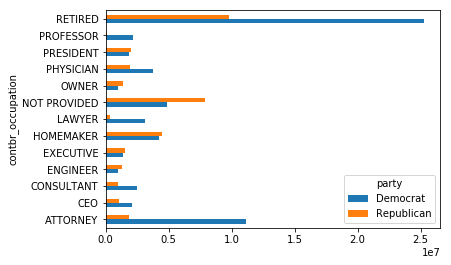

In [244]:
over_2mm.plot(kind='barh')
plt.show()

In [251]:
def get_top_amounts(group,key,n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.order(ascending=False)[:n]

In [252]:
grouped = fec_mrbo.groupby('cand_nm')

In [253]:
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

""
cand_nm


In [217]:
grouped.apply(get_top_amounts,'contbr_employer',n=10)

""
cand_nm


In [218]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])

In [219]:
labels = pd.cut(fec_mrbo.contb_receipt_amt,bins)

In [220]:
labels

Series([], Name: contb_receipt_amt, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]])

In [221]:
grouped = fec_mrbo.groupby(['cand_nm',labels])

In [222]:
grouped.size().unstack(0)

cand_nm
contb_receipt_amt


In [256]:
from mpl_toolkits.basemap import Basemap,cm
import numpy as np 
from matplotlib import rcParams
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt 

